In [12]:
# Import the required modules
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Step 1: Read in the dataset 

In [13]:
# Read the Heart_Disease_Prediction.csv file from the Resources folder into a Pandas DataFrame
file_path = Path("../Resources/Heart_Disease_Prediction.csv")
df_heart = pd.read_csv(file_path)

# View df
df_heart

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


## Step 2: Split the data into X and y and then into testing and training sets.

In [14]:
# Define the target, y
y = df_heart['Heart Disease']

# Define the features, X, to include all columns except the target
X = df_heart.drop(columns=['Heart Disease'])

In [15]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Step 3: Scale the data

In [16]:
# Create StandardScaler instance
scaler = StandardScaler()

# Fit Standard Scaller
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Step 4: Fit the Random Forest Model

In [17]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Step 5: Make predictions using the RFM

In [18]:
#Generate training predictions
predictions = rf_model.predict(X_test_scaled)

## Step 6: Evaluate the Model

In [19]:
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# Display results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,31,4
Actual 1,12,21


Accuracy Score : 0.7647058823529411
Classification Report
              precision    recall  f1-score   support

     Absence       0.72      0.89      0.79        35
    Presence       0.84      0.64      0.72        33

    accuracy                           0.76        68
   macro avg       0.78      0.76      0.76        68
weighted avg       0.78      0.76      0.76        68



## Step 7: Feature Importance

In [21]:
# Use Random Forests in sklearn to automatically calculate feature importance
importances = rf_model.feature_importances_

# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1343574588921989, 'ST depression'),
 (0.13002842347794846, 'Chest pain type'),
 (0.12816319215183153, 'Number of vessels fluro'),
 (0.11750129007698833, 'Thallium'),
 (0.11206437754368627, 'Max HR'),
 (0.07126003863087957, 'Slope of ST'),
 (0.07124581343155192, 'Cholesterol'),
 (0.06834678989269902, 'Age'),
 (0.06628604466100492, 'BP'),
 (0.04106156186486033, 'Exercise angina'),
 (0.02988501812785076, 'Sex'),
 (0.019755510519704006, 'EKG results'),
 (0.010044480728796068, 'FBS over 120')]

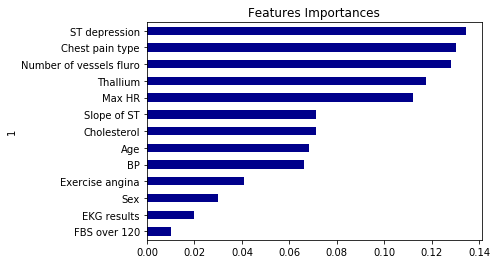

In [22]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='darkblue', title= 'Features Importances', legend=False)